IAU Projekt 1. fáza

Autori: Martin Raffáč, Tibor Vanek


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pylab as pylab
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
from matplotlib import pyplot
from collections import Counter

In [124]:
filename1 = "./dataset-003/measurements.csv"
measurements = pd.read_csv(filename1, sep='\t')
measurements.head()




,longitude,C2H3NO5,O3,CO,warning,Pb,PAHs,PM2.5,PRES,TEMP,latitude,NH3,H2CO,SO2,CH4,PM10,CFCs,NOx
0,30.28491,0.01960,8.26626,9.07784,0.0,46.83125,5.53330,5.37316,1101.06102,33.34540,60.02427,6.23330,54.29137,7.88335,5.85807,5.68070,28.12016,11.49560
1,120.89694,0.04735,8.35627,6.95474,1.0,48.68708,15.29667,7.42089,1141.23149,20.75105,14.95472,9.32493,53.43339,8.41893,8.32431,7.01594,82.17695,9.13370
2,141.95000,0.04530,7.47394,7.47366,1.0,60.75523,10.47662,8.29646,1117.39968,21.07022,39.46667,9.15644,31.70985,9.80100,9.24057,7.72587,19.48463,7.41425
3,15.07041,8.64588,8.50563,7.79137,0.0,54.89256,8.17284,8.34238,1175.94780,11.22310,37.49223,8.47673,58.04300,3.12505,6.73364,13.35810,55.11303,5.24699
4,-94.74049,0.02774,8.01382,9.46041,0.0,61.97648,6.41785,7.84354,1160.95559,-1.44749,32.50070,8.01924,64.31668,9.01725,6.75349,7.07762,50.38845,9.37646


In [67]:
filename2 = "./dataset-003/stations.csv"
stations = pd.read_csv(filename2, sep='\t')
stations.head()

,station,revision,QoS,longitude,code,latitude
0,Barra dos Coqueiros,2020-02-07,maintenance,-37.03861,BR,-10.90889
1,Tyoply Stan,"09/13/2018, 00:00:00",excellent,37.49338,RU,55.62047
2,Leland,2019-07-09,excellent,-78.04471,US,34.25628
3,Hermsdorf,15 Mar 2022,excellent,13.31783,DE,52.61131
4,Ulan Bator,"12/26/2016, 00:00:00",maintenance,106.88324,MN,47.90771


1. Základný opis dát spolu s ich charakteristikou 

V tejto časti uvedieme:
    ● Počet záznamov, počet atribútov, ich typy,
    ● Pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.
    ● Párová analýza dát: preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
    ● Párová analýza dát: Identifikujte závislostí medzi dvojicami atribútov (napr. korelácie)
    ● Párová analýza dát: Identifikujte závislosti medzi predikovanou premennou a ostatnými
    premennými (potenciálnymi prediktormi).

dataset measurements.csv obsahuje 12075 záznamov o chemických prvkoch. Počet atribútov v tomto datasete je 18. 

dataset stations.csv obsahuje 1103 záznamov o chemických prvkoch. Počet atribútov v tomto datasete je 6.

Zoznam daných atribútov:

 ●   longitude  číselná hodnota
 ●   C2H3NO5    číselná hodnota
 ●   O3         číselná hodnota
 ●   CO         číselná hodnota
 ●   warning    číselná hodnota
 ●   Pb         číselná hodnota
 ●   PAHs       číselná hodnota 
 ●   PM2.5      číselná hodnota
 ●   PRES       číselná hodnota
 ●   TEMP       číselná hodnota
 ●   latitude   číselná hodnota
 ●   NH3        číselná hodnota
 ●   H2CO       číselná hodnota
 ●   SO2        číselná hodnota
 ●   CH4        číselná hodnota
 ●   PM10       číselná hodnota
 ●   CFCs       číselná hodnota
 ●   NOx        číselná hodnota



In [68]:
measurements.describe()

,longitude,C2H3NO5,O3,CO,warning,Pb,PAHs,PM2.5,PRES,TEMP,latitude,NH3,H2CO,SO2,CH4,PM10,CFCs,NOx
count,12075.000000,12027.000000,12027.000000,12027.000000,12027.000000,12027.000000,12026.000000,12027.000000,12075.000000,12027.000000,12075.000000,12027.000000,12027.000000,12027.000000,12026.000000,12026.000000,12025.000000,12026.000000
mean,15.192940,0.170331,8.243161,8.226100,0.596491,50.186935,8.502031,8.229532,1124.800136,14.959069,28.472685,7.713508,47.566325,9.002650,8.492999,7.439091,51.446245,7.460853
std,74.224284,1.055270,0.996025,1.003052,0.490622,12.100899,1.931576,1.005640,43.308139,9.934451,22.845126,1.950890,13.212382,1.672296,1.986720,1.875983,13.186757,1.727860
min,-156.474320,0.000000,4.660310,4.464290,0.000000,0.000000,1.058880,4.218270,1050.001570,-21.492790,-54.800000,0.000000,0.000000,1.801440,0.233150,0.994780,0.000000,0.596490
25%,-52.355580,0.027100,7.572615,7.541400,0.000000,42.104350,7.121487,7.558260,1087.231535,8.249165,14.620720,6.370755,38.573510,8.172625,7.148212,6.165990,42.674950,6.351095
50%,11.500000,0.042240,8.243740,8.213650,1.000000,50.260780,8.562045,8.234510,1124.654680,14.956420,35.899720,7.601500,47.630350,9.221320,8.649600,7.352215,51.426230,7.304430
75%,74.122860,0.098490,8.914240,8.910910,1.000000,58.312705,9.859282,8.910315,1162.067155,21.660035,44.976390,9.037325,56.478610,10.085010,9.925450,8.647887,60.334910,8.525882
max,178.004170,100.000000,12.364080,11.627400,1.000000,100.000000,15.863860,11.944030,1199.998800,54.773100,68.798330,15.767780,100.000000,15.619170,14.350810,15.809190,100.000000,15.055640


In [69]:
len(measurements)

12075

In [70]:
len(measurements.columns)

18

In [71]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  12075 non-null  float64
 1   C2H3NO5    12027 non-null  float64
 2   O3         12027 non-null  float64
 3   CO         12027 non-null  float64
 4   warning    12027 non-null  float64
 5   Pb         12027 non-null  float64
 6   PAHs       12026 non-null  float64
 7   PM2.5      12027 non-null  float64
 8   PRES       12075 non-null  float64
 9   TEMP       12027 non-null  float64
 10  latitude   12075 non-null  float64
 11  NH3        12027 non-null  float64
 12  H2CO       12027 non-null  float64
 13  SO2        12027 non-null  float64
 14  CH4        12026 non-null  float64
 15  PM10       12026 non-null  float64
 16  CFCs       12025 non-null  float64
 17  NOx        12026 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [72]:
stations.describe()

,longitude,latitude
count,1103.000000,1103.000000
mean,15.178244,28.546164
std,74.259394,22.830913
min,-156.474320,-54.800000
25%,-52.280985,14.625780
50%,11.500000,35.956640
75%,74.216030,44.982700
max,178.004170,68.798330


In [73]:
len(stations)

1103

In [74]:
len(stations.columns)

6

In [75]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    1103 non-null   object 
 1   revision   1103 non-null   object 
 2   QoS        1103 non-null   object 
 3   longitude  1103 non-null   float64
 4   code       1103 non-null   object 
 5   latitude   1103 non-null   float64
dtypes: float64(2), object(4)
memory usage: 51.8+ KB


2.1 Identifikácia problémov v dátach s prvotným riešením v datasete measurements.csv. V tomto datasete sme našli duplicitné záznamy a chýbajúce hodnoty. 

In [76]:
# Vyhľadanie duplicitných záznamov

duplicate = measurements[measurements.duplicated()]
measurements = measurements.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(measurements)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")


Počet záznamov v datasete: 11897
V datasete sa nachádza: 178 duplikátov.


Pomocou týchto príkazov sme zistili či sa v datasete nachádzajú duplicitné záznamy, program detegoval 178 duplikátnych záznamov.
Tieto duplikáty sme z datasetu vymazali aby nespôsobovali chyby pri neskoršej práci s dátami.


In [125]:
measurements.isnull().sum()

longitude     0
C2H3NO5      48
O3           48
CO           48
warning      48
Pb           48
PAHs         49
PM2.5        48
PRES          0
TEMP         48
latitude      0
NH3          48
H2CO         48
SO2          48
CH4          49
PM10         49
CFCs         50
NOx          49
dtype: int64

Z tejto štatistiky vyplíva, že viacero atribútov má nulové hodnoty. Polia s nulovou hodnotou sme nahradili priemerom z dôvodu aby sme neprišli o dáta.

In [126]:
C2H3NO5_mean = measurements['C2H3NO5'].mean()
measurements['C2H3NO5'] = measurements['C2H3NO5'].fillna(C2H3NO5_mean)
O3_mean = measurements['O3'].mean()
measurements['O3'] = measurements['O3'].fillna(O3_mean)
CO_mean = measurements['CO'].mean()
measurements['CO'] = measurements['CO'].fillna(CO_mean)
Pb_mean = measurements['Pb'].mean()
measurements['Pb'] = measurements['Pb'].fillna(Pb_mean)
PAHs_mean = measurements['PAHs'].mean()
measurements['PAHs'] = measurements['PAHs'].fillna(PAHs_mean)
PM25_mean = measurements['PM2.5'].mean()
measurements['PM2.5'] = measurements['PM2.5'].fillna(PM25_mean)
TEMP_mean = measurements['TEMP'].mean()
measurements['TEMP'] = measurements['TEMP'].fillna(TEMP_mean)
NH3_mean = measurements['NH3'].mean()
measurements['NH3'] = measurements['NH3'].fillna(NH3_mean)
H2CO_mean = measurements['H2CO'].mean()
measurements['H2CO'] = measurements['H2CO'].fillna(H2CO_mean)
SO2_mean = measurements['SO2'].mean()
measurements['SO2'] = measurements['SO2'].fillna(SO2_mean)
CH4_mean = measurements['CH4'].mean()
measurements['CH4'] = measurements['CH4'].fillna(CH4_mean)
PM10_mean = measurements['PM10'].mean()
measurements['PM10'] = measurements['PM10'].fillna(PM10_mean)
CFCs_mean = measurements['CFCs'].mean()
measurements['CFCs'] = measurements['CFCs'].fillna(CFCs_mean)
NOx_mean = measurements['NOx'].mean()
measurements['NOx'] = measurements['NOx'].fillna(NOx_mean)

Keďže atribút warning sme nemohli nahradiť priemernou hodnotou lebo v datasete sa viskitoval len s hodnotami 1 alebo 0
rozhodli sme sa vypočítať priemer a zaokruhliť ho na najbližšie celé číslo a následne toto číslo doplniť do prázdnych polí.

In [127]:
warning_avg = measurements['warning'].mean()

if warning_avg >= 0.5:
    warning_avg = 1
else:
    warning_avg = 0

measurements['warning'] = measurements['warning'].fillna(warning_avg)

In [128]:
measurements.isnull().sum()

longitude    0
C2H3NO5      0
O3           0
CO           0
warning      0
Pb           0
PAHs         0
PM2.5        0
PRES         0
TEMP         0
latitude     0
NH3          0
H2CO         0
SO2          0
CH4          0
PM10         0
CFCs         0
NOx          0
dtype: int64

Atribúty z tohoto datasetu measurements.csv majú číslené hodnoty. Atribúty longitude a latitude budeme potrebovať na spojenie s datasetom stations.csv preože tieto atribúty sú spoločné. 

2.2 Identifikácia problémov v dátach s prvotným riešením v datasete stations.csv. V tomoto datasete sme našli atribút revision, ktorý nemal korektné formátovanie.  

In [81]:
duplicate = stations[stations.duplicated()]
stations = stations.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(stations)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")


Počet záznamov v datasete: 1103
V datasete sa nachádza: 0 duplikátov.


Zistili sme že v datasete stations.csv sa nenachádzajú žiadne duplikáty.

In [82]:
def invalidMonth(invalidMonth):
    return {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09', 
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
    }[invalidMonth]

for x in stations['revision']:
 
 # nahradim nulovy datum 
 if(len(x)==20):
    invalidZero = x.replace(", 00:00:00", "")
    dates = invalidZero.split("/")
    newDate = dates[2] + "-" + dates[0] + "-" + dates[1]
    stations['revision'] = stations['revision'].replace(x, newDate)
 
 # nahradim lomitkovy datum
 elif(len(x)==10):
    stations['revision'] = stations['revision'].replace(x, x.replace("/", "-"))
  
 # menim slovo mesiac na cislo
 elif(len(x)==11):
    dates = x.split(" ")
    newDate = dates[2] + "-" + invalidMonth(dates[1]) + "-" + dates[0]
    stations['revision'] = stations['revision'].replace(x, newDate)


In [83]:
stations

,station,revision,QoS,longitude,code,latitude
0,Barra dos Coqueiros,2020-02-07,maintenance,-37.03861,BR,-10.90889
1,Tyoply Stan,2018-09-13,excellent,37.49338,RU,55.62047
2,Leland,2019-07-09,excellent,-78.04471,US,34.25628
3,Hermsdorf,2022-03-15,excellent,13.31783,DE,52.61131
4,Ulan Bator,2016-12-26,maintenance,106.88324,MN,47.90771
...,...,...,...,...,...,...
1098,Harstad,2015-06-22,average,16.54165,NO,68.79833
1099,Bushey,2017-10-11,accep,-0.36053,GB,51.64316
1100,Pahrump,2015-07-21,maintenance,-115.98391,US,36.20829
1101,Saint-Genis-Laval,2021-06-18,accep,4.79340,FR,45.69558


Zistili sme, že jednotlivé dátumy sú zadávané v rôznych formátoch, preto bolo potrebné ich všetky zjednotiť do jedného. rozhodli sme sa pre formát: rok-mesiac-deň

In [84]:
print(stations.QoS.unique())


['maintenance' 'excellent' 'accep' 'average' 'building' 'good'
 'acceptable' 'maitennce']


In [85]:
print(stations.code.unique())

['BR' 'RU' 'US' 'DE' 'MN' 'ET' 'CR' 'IN' 'TR' 'DO' 'BG' 'MX' 'CN' 'RS'
 'MG' 'BY' 'SK' 'JP' 'PH' 'YE' 'AU' 'AZ' 'PK' 'TH' 'HR' 'GB' 'CA' 'NG'
 'CU' 'LY' 'CO' 'IR' 'MY' 'BE' 'PL' 'DZ' 'EE' 'UA' 'FR' 'TL' 'JM' 'EG'
 'KZ' 'VE' 'GH' 'TZ' 'LT' 'EC' 'ES' 'UZ' 'IT' 'ID' 'AR' 'CD' 'MM' 'PR'
 'TN' 'KR' 'NO' 'UY' 'PA' 'GM' 'PT' 'SV' 'NL' 'PG' 'PE' 'DK' 'LK' 'CZ'
 'AD' 'AT' 'MK' 'KH' 'BW' 'XK' 'CG' 'CM' 'RW' 'BA' 'IL' 'MA' 'MT' 'UG'
 'IE' 'KE' 'HT' 'AF' 'TJ' 'CH' 'SL' 'SY' 'GT' 'ZA' 'CL' 'SA' 'CF' 'BO'
 'AM' 'TT' 'BD' 'DJ' 'GA' 'SD' 'SE' 'VN' 'CI' 'MQ' 'GN' 'KG' 'RO' 'VU'
 'TW' 'RE' 'NZ' 'FI']


Ďalej sme hľadali gramatické chyby v stĺpcoch QoS a code. Zistili sme, že v stĺpci QoS sa nachádzajú gramatické chyby. ktoré je treba opraviť.

In [86]:
stations['QoS'] = stations['QoS'].astype(str).str.replace('maitennce',"maintenance")
stations['QoS'] = stations['QoS'].astype(str).str.replace('accep',"acceptable")
stations['QoS'] = stations['QoS'].astype(str).str.replace('acceptabletabletable',"acceptable")
stations['QoS'] = stations['QoS'].astype(str).str.replace('acceptabletable',"acceptable")

In [87]:
print(stations.QoS.unique())

['maintenance' 'excellent' 'acceptable' 'average' 'building' 'good']


In [88]:
stations.isnull().sum()

station      0
revision     0
QoS          0
longitude    0
code         0
latitude     0
dtype: int64

Rovnako sme zisťovali či sa aj v tomto datasete nenachádzajú nulové hohnoty no zistili sme, že nie.

Hodnoty v dátach

<AxesSubplot:ylabel='Frequency'>

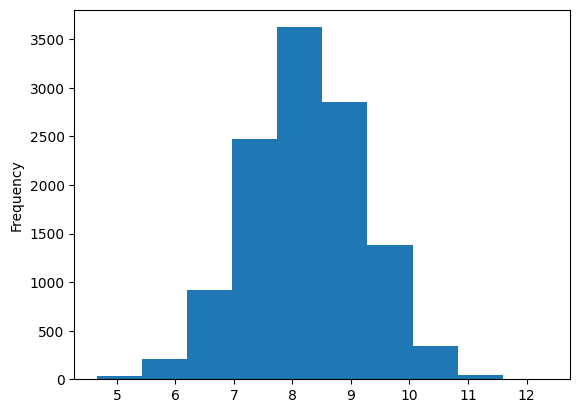

In [89]:
measurements['O3'].plot(kind='hist')

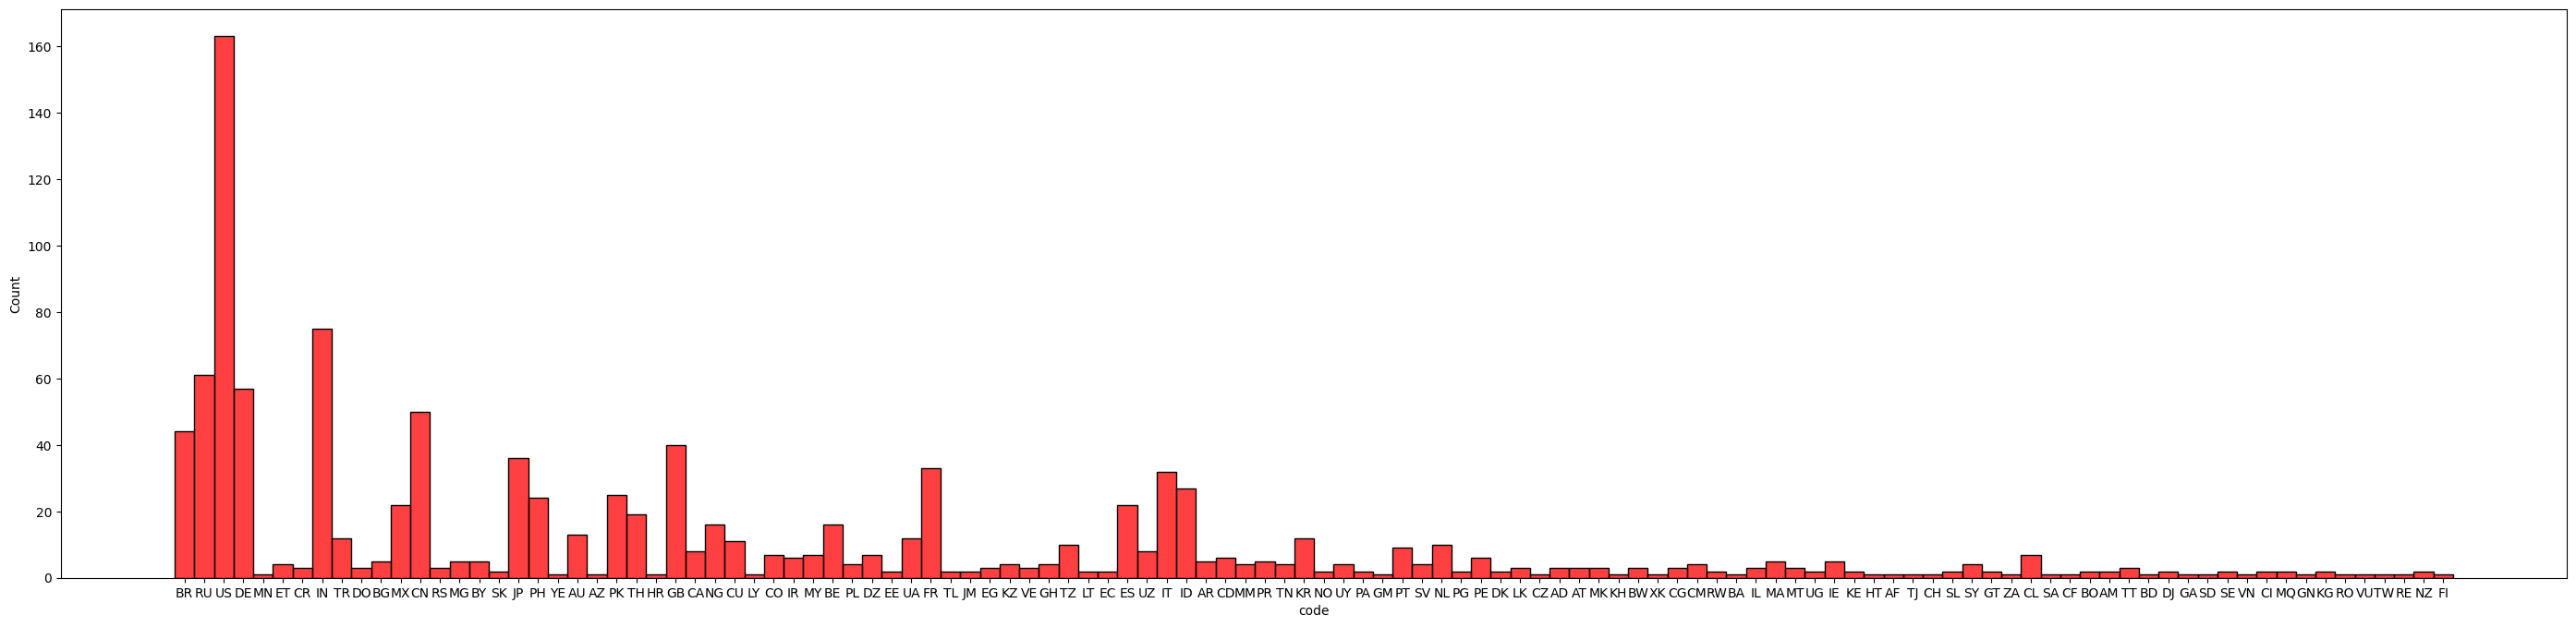

In [90]:

fig = plt.gcf()
fig.set_size_inches(35,8)
g = sns.histplot(stations['code'],bins=50, color = "red")


v tomto grafe sme sa zamerali na početnosť staníc v jednotlivých štátoch 

<AxesSubplot:xlabel='QoS', ylabel='count'>

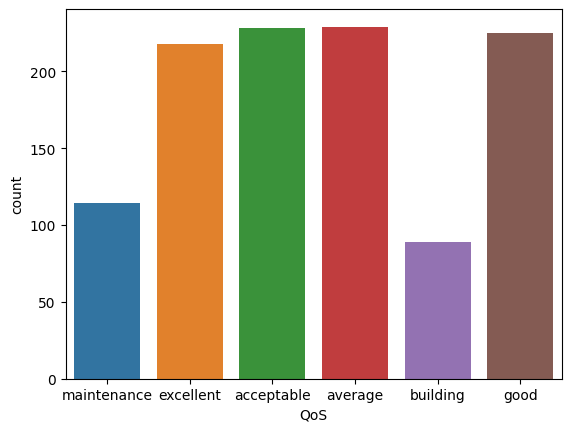

In [120]:
sns.countplot(data=stations, x="QoS")

V tomto grafe sa zameriavame na atribút QoS, ktorý nám hovorí o kvalite ovzdušia.

In [91]:
measurements.warning.describe()

count    11897.000000
mean         0.599059
std          0.490110
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: warning, dtype: float64

In [92]:
measurements['warning'].value_counts()

1.0    7127
0.0    4770
Name: warning, dtype: int64

<AxesSubplot:xlabel='warning', ylabel='count'>

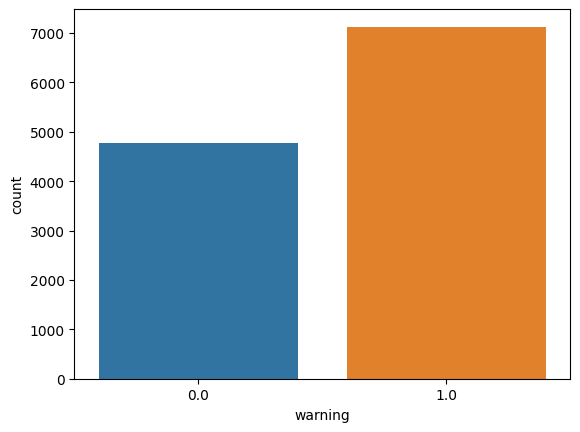

In [93]:
sns.countplot(data=measurements, x="warning")

týmto grafom sme skúmali koľko miest má warning hodnotu 0 a koľko hodnotu 1.

Relevantné atribúty

Pri vyberaní relevantnosti sme postupovali podľa stránky https://waqi.info/ na ktorej spomínali 6 relevantých atribútov, následne sme sa na tieto atribúty zamerali.

Medzi tieto atribúty patria: 

particulate matter (PM2.5 and PM10)
Ozone (O3)
Nitrogen Dioxide (NO2)
Sulfur Dioxide (SO2)
Carbon Monoxide (CO) emissions

In [98]:
'''
del measurements['C2H3NO5']
del measurements['Pb']
del measurements['PAHs']
del measurements['NH3']
del measurements['H2CO']
del measurements['CH4']
del measurements['CFCs']
del measurements['NOx']
'''

In [99]:
measurements.head()

,longitude,O3,CO,warning,PM2.5,PRES,TEMP,latitude,SO2,PM10
0,30.28491,8.26626,9.07784,0.0,5.37316,1101.06102,33.34540,60.02427,7.88335,5.68070
1,120.89694,8.35627,6.95474,1.0,7.42089,1141.23149,20.75105,14.95472,8.41893,7.01594
2,141.95000,7.47394,7.47366,1.0,8.29646,1117.39968,21.07022,39.46667,9.80100,7.72587
3,15.07041,8.50563,7.79137,0.0,8.34238,1175.94780,11.22310,37.49223,3.12505,13.35810
4,-94.74049,8.01382,9.46041,0.0,7.84354,1160.95559,-1.44749,32.50070,9.01725,7.07762


<AxesSubplot:xlabel='O3', ylabel='Count'>

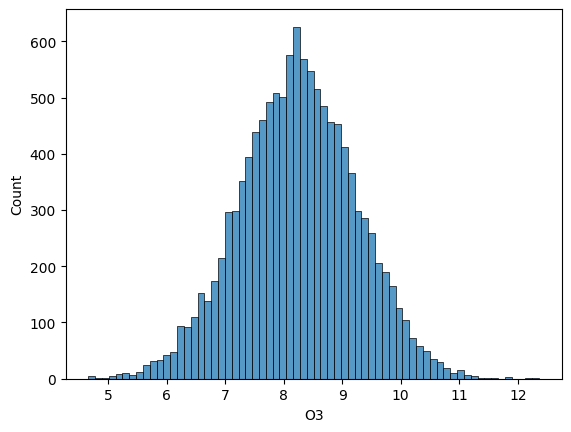

In [102]:
sns.histplot(measurements.O3)

<AxesSubplot:ylabel='O3'>

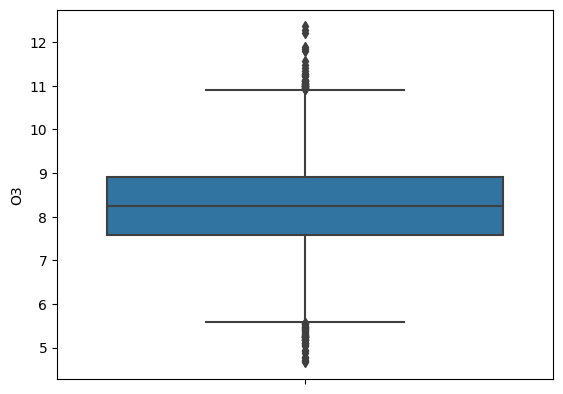

In [103]:
sns.boxplot(y=measurements.O3)

<AxesSubplot:xlabel='CO', ylabel='Count'>

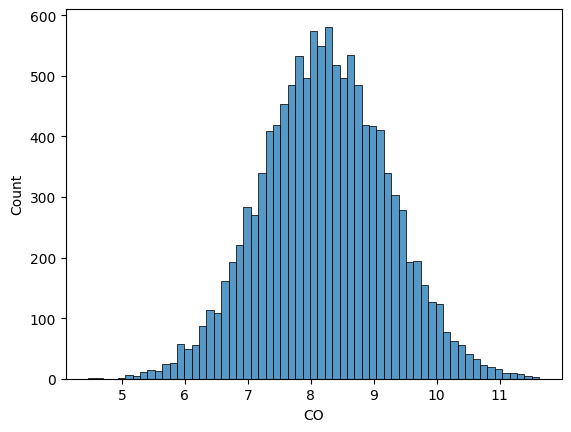

In [104]:
sns.histplot(measurements.CO)

<AxesSubplot:ylabel='O3'>

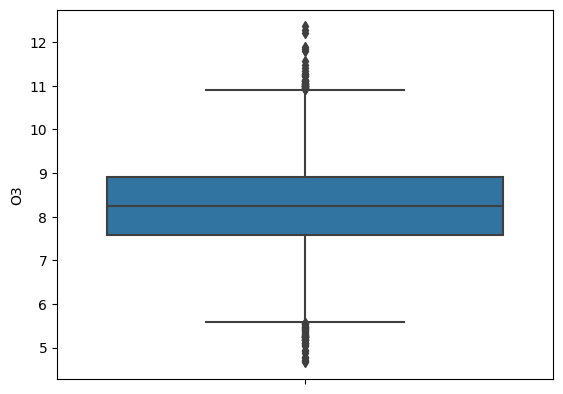

In [105]:
sns.boxplot(y=measurements.O3)

<AxesSubplot:xlabel='PM2.5', ylabel='Count'>

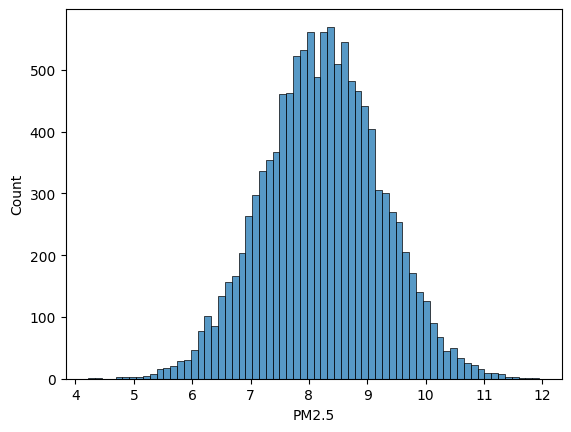

In [108]:
sns.histplot(measurements['PM2.5'])

<AxesSubplot:ylabel='PM2.5'>

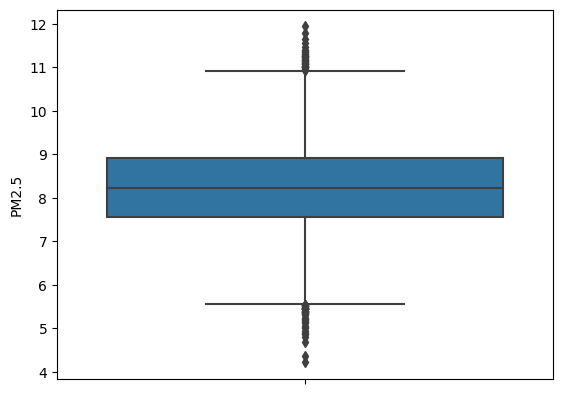

In [109]:
sns.boxplot(y=measurements['PM2.5'])

<AxesSubplot:xlabel='SO2', ylabel='Count'>

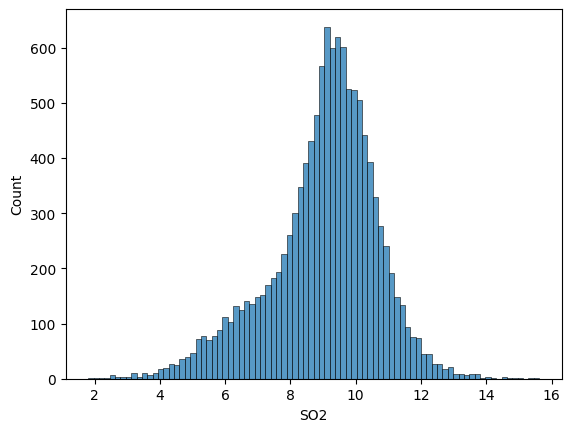

In [110]:
sns.histplot(measurements.SO2)

<AxesSubplot:ylabel='SO2'>

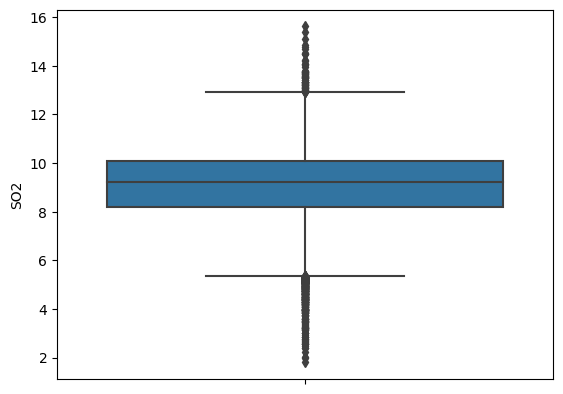

In [111]:
sns.boxplot(y=measurements.SO2)

<AxesSubplot:xlabel='PM10', ylabel='Count'>

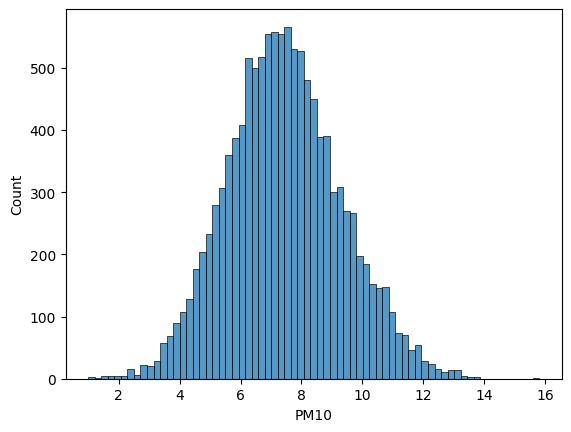

In [112]:
sns.histplot(measurements.PM10)

<AxesSubplot:ylabel='PM10'>

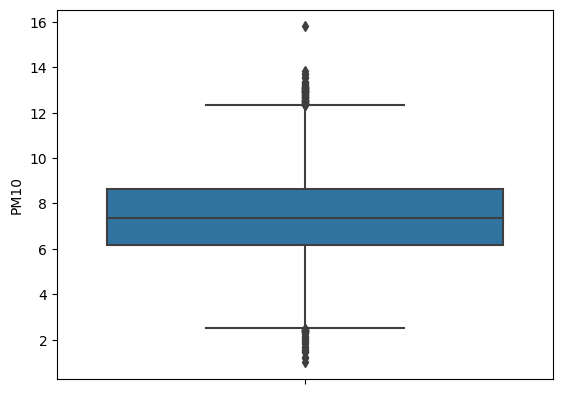

In [113]:
sns.boxplot(y=measurements.PM10)

<AxesSubplot:xlabel='PRES', ylabel='Count'>

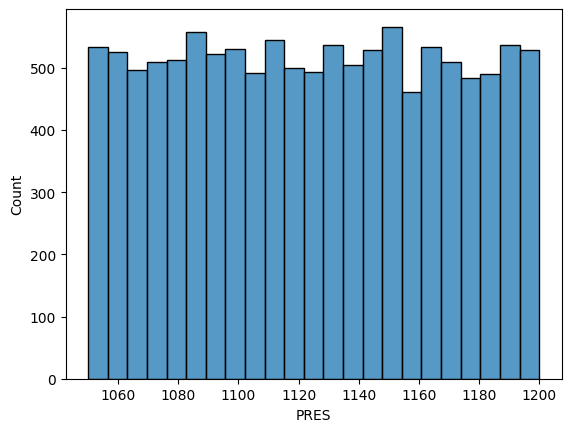

In [117]:
sns.histplot(measurements.PRES)

<AxesSubplot:ylabel='PRES'>

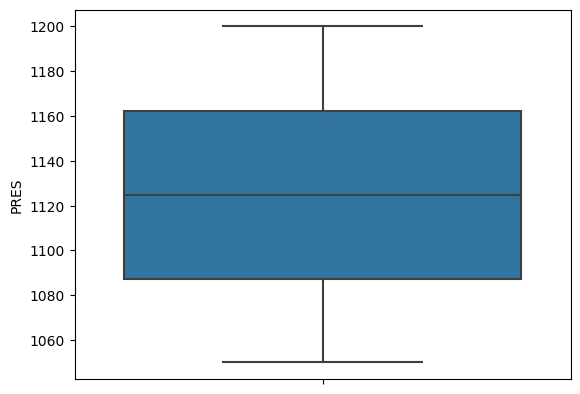

In [118]:
sns.boxplot(y=measurements.PRES)

<AxesSubplot:xlabel='TEMP', ylabel='Count'>

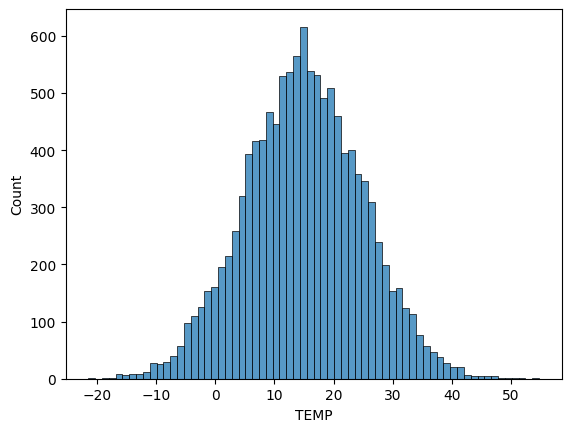

In [115]:
sns.histplot(measurements.TEMP)

<AxesSubplot:ylabel='TEMP'>

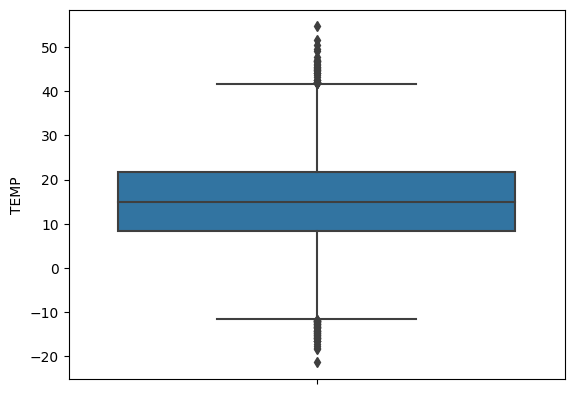

In [119]:
sns.boxplot(y=measurements.TEMP)

Párová analýza dát

<AxesSubplot:>

<Figure size 700x700 with 0 Axes>

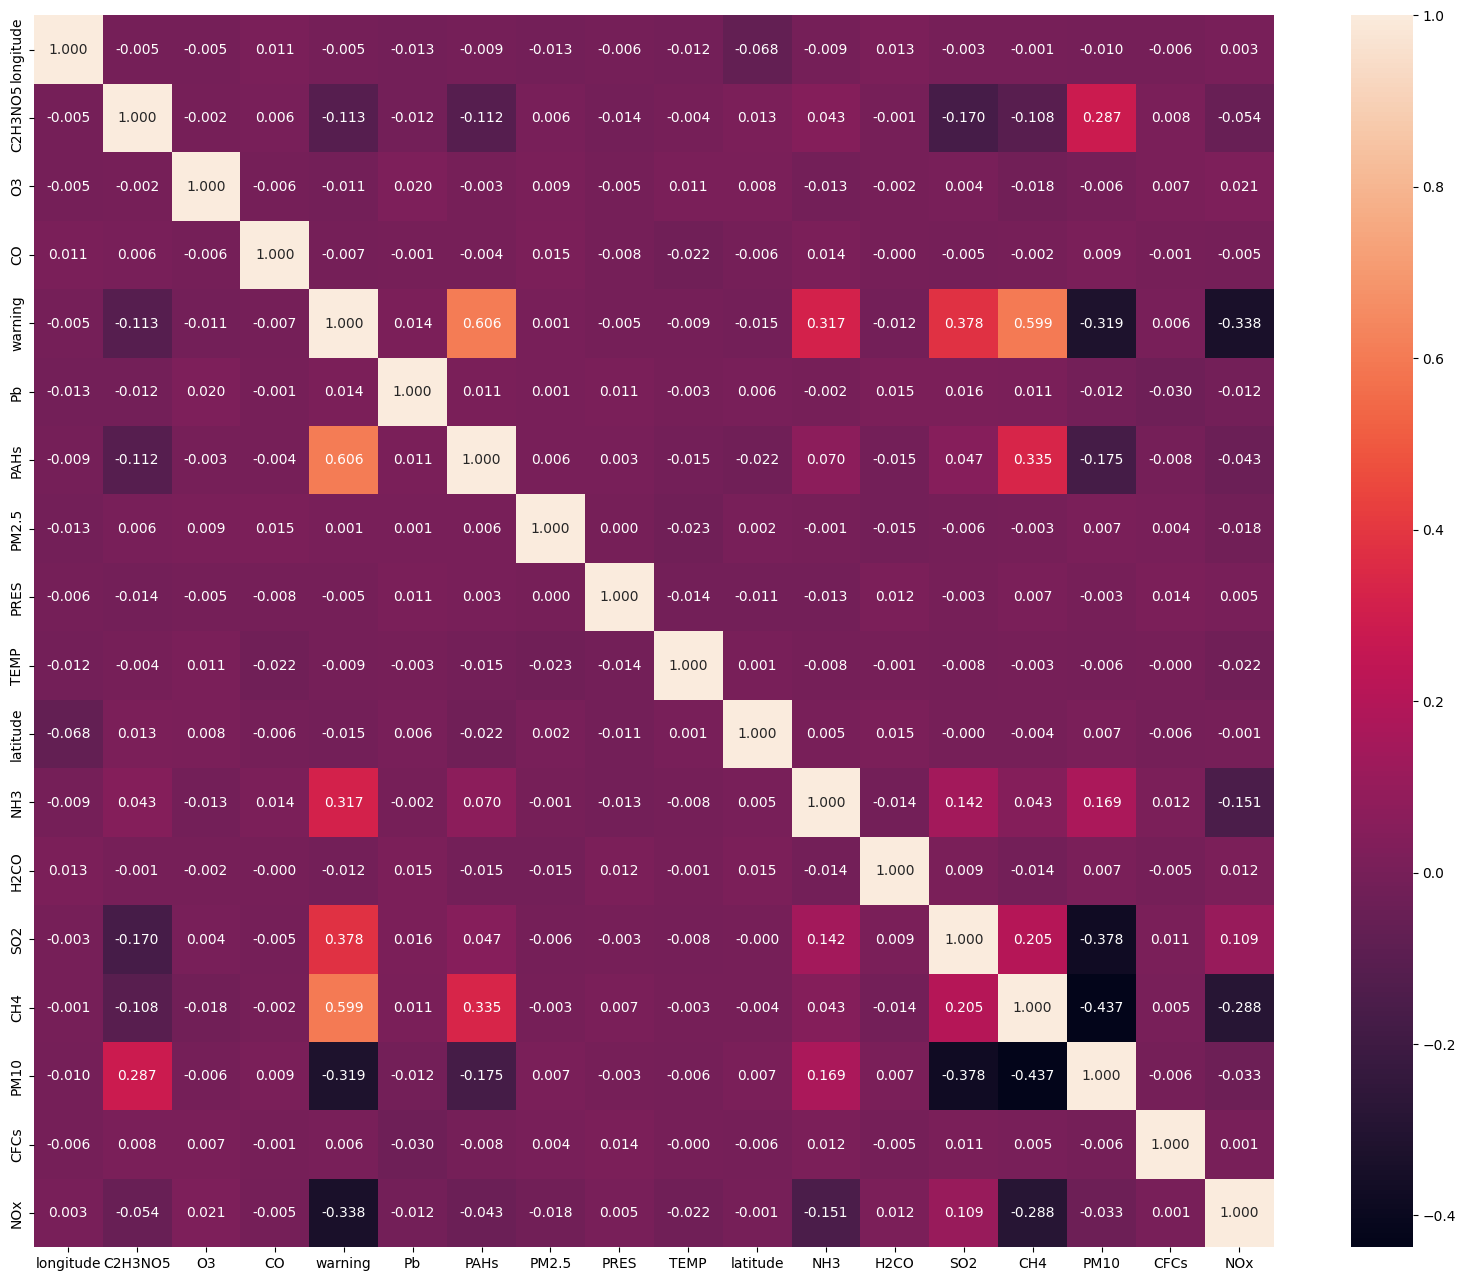

In [129]:
fig = plt.gcf()
fig.set_size_inches(7,7)
figure, ax = plt.subplots(figsize=(20,16))
sns.heatmap(measurements.corr(),ax=ax, annot =True, fmt = ".3f")